___
# Atividade: Modelos probabilísticos contínuos e Dados
___

## Aula 14

**Preparo Prévio:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Modelo Normal (pág. 197 a 201).
2. Executar o arquivo `Aula13 Modelos probabilísticos contínuos.ipynb`
3. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de quantis ou QQplot (pág. 27 - Exemplo 1.10 e 1.11).
4. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Gráfico de probabilidade (similar ao gráfico QQplot) (pág. 201 a 204) - Exemplo 6.10).

**Hoje:**
1. Reforçar mais ferramentas para Análise Descritiva
2. Avaliar, descritivamente, adequação da normal aos dados.
3. Contrastar resultados teóricos e empíricos.


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from numpy import mean, var, arange

print('Esperamos trabalhar no diretório')
print(os.getcwd())

padaria = pd.read_excel('Padaria.xlsx')

Esperamos trabalhar no diretório
C:\Users\dell\Documents\GitHub\CD1S17\APS\Atividade Aula 14


___
## <font color='blue'>Padaria </font>

Uma empresa deve decidir onde construir uma padaria: <font color='green'>Bairro A </font> ou <font color='orange'> Bairro B </font>. 

Como ambos os bairros possuem densidades populacionais próximas, os investidores visam atingir um público alvo de maior renda familiar. 
Assim, quanto maior o número de famílias com rendas familiares mais altas, maior será a chance do empreendimento ser bem sucedido. 

Considerando que a decisão final seja baseada em informações sobre a renda familiar dos moradores desses dois bairros, responda:

1. Calcule algumas medidas resumo úteis para entender o comportamento dessa variável em ambos os bairros. Analise.

2. Construa o histograma dos dados e compare as distribuições de renda familiar (em mil reais) dos dois bairros. Qual é o melhor bairro para construir a padaria? Justifique.

3. Construa o QQ-Plot considerando quantil amostral do Bairro A vs quantil amostral do Bairro B. Esse gráfico de quantis amostrais auxilia a responder qual é o melhor bairro para construir a padaria? Justifique claramente.
   Dica: veja construção desse gráfico no Magalhães e Lima (7ª edição) - pág. 27 e 29.

3. Assuma que $X$: renda familiar de um determinado bairro tenha $\mu$ estimada pela média amostral ($\bar{x}$) e tenha $\sigma^2$ estimada pela variância amostral, ambas de um mesmo bairro em questão. Verifique, visualmente/graficamente, se a distribuição normal é adequada para estimar a renda familiar de cada bairro. Para isso, interprete os seguintes gráficos:
      1. Construa o histograma dos dados junto com a fdp da distribuição normal e analise.
      
      2. Construa o Gráfico de probabilidade considerando o quantil amostral vs o quantil teórico da distribuição normal. Interprete esse gráfico com intuito de avaliar se: A renda de cada bairro é bem modelada por uma distribuição normal?
      Dica: veja Exemplo 6.8 do Magalhães e Lima (7ª. edição) de como obter as frequências relativas acumuladas a partir de uma amostra de tamanho n=500 (de cada bairro). Os quantis teóricos da distribuição normal podem ser obtidos pelo comando `stats.norm.ppf(p, loc=mu, scale=sigma)`, sendo `p` a frequencia relativa acumulada  obtida anteriormente.
      
      4. Construa um gráfico dos valores observados vs frequência relativa acumulada (a partir dos dados) e vs função de distribuição acumulada.
   
4. Independente da sua resposta do item anterior, assuma que $X$: renda familiar de um determinado bairro segue uma distribuição normal considerando as estimativas amostrais como valores dos parâmetros de cada bairro. Nesse caso, para cada bairro, calcule:
      1. probabilidade de uma família possuir renda familiar maior do que 17 mil reais.

      2. sabendo que a famíliar tem mais do que 15 mil reais de renda familiar, qual a probabilidade dessa possuir renda inferior a 16 mil reais.
      
      3. qual a menor renda familiar dos 5% das famílias que mais ganham em cada bairro? 



### Exercício 1

In [2]:
dO = pd.DataFrame()
dO['A'] = sorted(padaria.A)
dO['B'] = sorted(padaria.B)
dO.describe()

,A,B
count,500.000000,500.000000
mean,15.321676,14.221997
std,0.592599,1.840182
min,13.450880,9.704160
25%,14.919380,12.843832
50%,15.335840,14.348205
75%,15.702140,15.770295
max,17.151280,18.911520


É possível identificar que no bairro A há uma renda média de R$15321,67. O Desvio padrão de 592,60 reais nos permite inferir que é um bairro bastante homogêneo. Os quartis são bastante próximos, e isso confirma nossa inferência de pouca dispersão.

O bairro B possui uma renda média de R$14222,00. Pela distância entre os quartis e o grande dsevio-padrão (se comparado ao do bairro A), nos permitem inferir uma alta dispersão. Ou seja, o bairro B é mais desigual/heterogêneo que o bairro A.

### Exercício 2

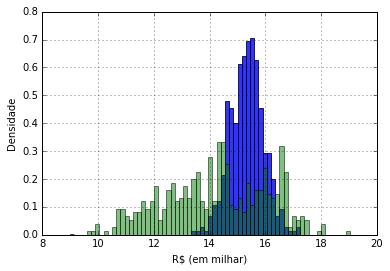

In [3]:
faixa = arange(9, 20, 0.15)
padaria.A.hist(normed=1, bins = faixa, alpha = 0.8)
padaria.B.hist(normed=1, bins = faixa, alpha = 0.5)
plt.xlabel("R$ (em milhar)")
plt.ylabel("Densidade")
plt.show()

O melhor nairro para se construir a padaria é o bairro A. Visto que o bairro A possui uma renda mais concentrada num valor relativamente alto, é possível inferir que a cadência de compras na padaria será "constante". O bairro B possui famílias com alta renda, entretanto essas famílias não são maioria, o que levaria a uma baixa frequência de clientes na padaria.

### Exercício 3

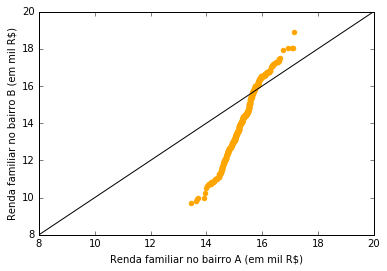

In [4]:
plt.plot((6,20),(6,20), color='black')
plt.scatter(dO.A,dO.B, color= 'orange')
plt.xlabel("Renda familiar no bairro A (em mil R$)")
plt.ylabel("Renda familiar no bairro B (em mil R$)")
plt.xlim(8,20)
plt.ylim(8,20)
plt.show()

Caso a padaria fosse destinada a atrair o maior número de consumidores, sem dúvidas seria mais viável abrir o estabelecimento no bairro A, visto que os 75% de famílias com rendas mais baixas no bairro A possuem uma renda maior que os 75% de famílias com rendas mais baixas no bairro B. Entretanto, se a padaria for destinada ao público de amior renda no geral, seria mais interessante abri-la no bairro B, visto que lá estão localizadas as famílias com maiores rendas.

### Exercício 4

#### A)


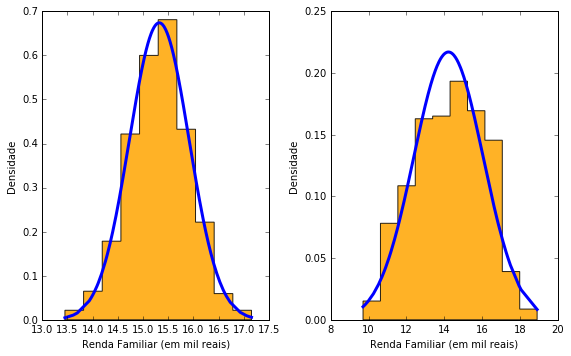

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
xA = sorted(padaria.A)
xB = sorted(padaria.B)
miA = mean(padaria.A)
sigmaA = (var(padaria.A))**0.5
miB = mean(padaria.B)
sigmaB = (var(padaria.B))**0.5
ax1.hist(xA, normed=1, histtype='stepfilled',alpha=0.85, color='orange')
ax1.plot(xA, stats.norm.pdf(xA, loc=miA, scale=sigmaA),alpha=1, lw=3, color='blue')
ax1.set_xlabel("Renda Familiar (em mil reais)")
ax2.hist(xB, normed=1, histtype='stepfilled',alpha=0.85, color='orange')
ax1.set_ylabel("Densidade")
ax2.plot(xB, stats.norm.pdf(xB, loc=miB, scale=sigmaB),alpha=1, lw=3, color='blue')
ax2.set_xlabel("Renda Familiar (em mil reais)")
ax2.set_ylabel("Densidade")

plt.tight_layout(1)

As amostras seguem uma distribuicão normal, o que nos permite padronizar os dados para identificar as diferenças entre os dois públicos dos dois bairros. Podemos encontrar as probabilidades de a população de algum bairro ser mais assídua nas compras ou comprar por preços mais altos. Isso também nos permite analisar os dados e tentar enxergar o panorama geral do bairro, e não apenas os resultados da amostra.

#### B)

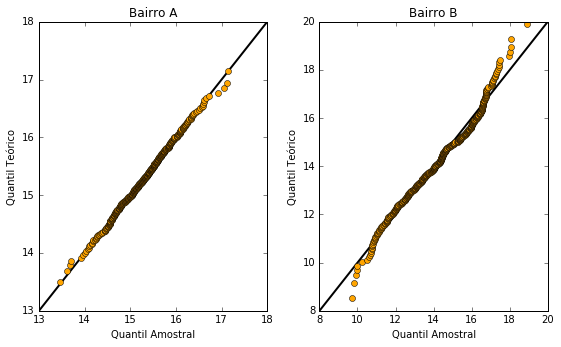

In [6]:
f, (fra_A, fra_B) = plt.subplots(1, 2, figsize=(8,5))

fra = []
for i in range(len(padaria)):
    fra.append ((i+0.5)/(len(padaria)))

frat_a = []    
for i in range(len(fra)):
    frat_a.append(stats.norm.ppf(fra[i], miA, sigmaA))
    
frat_b = []
for i in range(len(fra)):
    frat_b.append(stats.norm.ppf(fra[i], miB, sigmaB))


fra_A.plot((13,18),(13,18), color='black', alpha=1, lw=2)
fra_A.plot(xA, frat_a, 'o', color='orange', alpha=1)
fra_A.set_xlabel("Quantil Amostral")
fra_A.set_ylabel("Quantil Teórico")
fra_A.set_title("Bairro A")
fra_B.set_title("Bairro B")
fra_B.plot((8,20),(8,20), color='black', alpha=1, lw=2)
fra_B.plot(xB, frat_b, 'o', color='orange', alpha=1)
fra_B.set_xlabel("Quantil Amostral")
fra_B.set_ylabel("Quantil Teórico")

plt.tight_layout(1.5)

#### C)

Valores Amostrais Vs Frequência Relativa Acumulada 

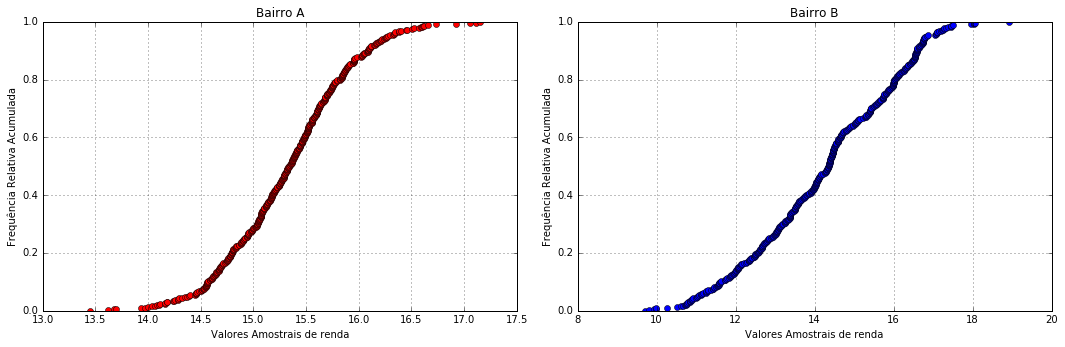

In [7]:
f, (A_fra, B_fra) = plt.subplots(1, 2, figsize=(15,5))

A_fra.plot(dO.A, fra, 'o', color='red')
B_fra.plot(dO.B, fra, 'o', color='blue')
A_fra.set_xlabel("Valores Amostrais de renda")
A_fra.set_ylabel("Frequência Relativa Acumulada")
A_fra.set_title("Bairro A")
B_fra.set_xlabel("Valores Amostrais de renda")
B_fra.set_ylabel("Frequência Relativa Acumulada")
B_fra.set_title("Bairro B")
B_fra.grid(True)
A_fra.grid(True)
plt.tight_layout(1.5)

Valores Amostrais Vs Função de Distribuição Acumulada

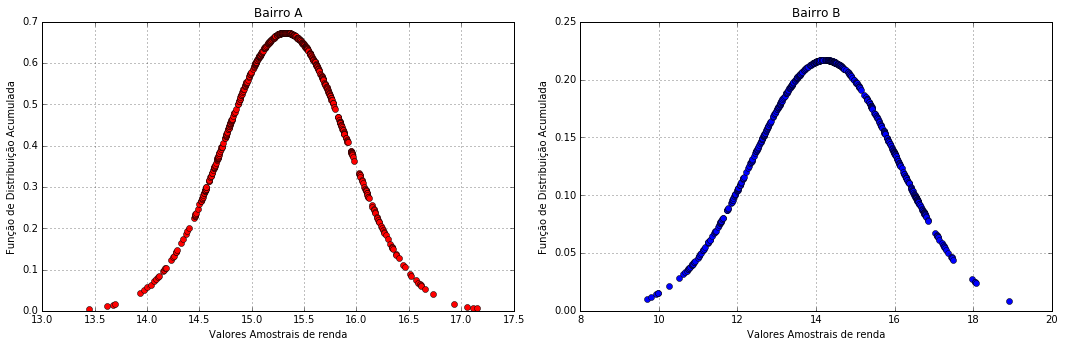

In [8]:
f, (A_cdf, B_cdf) = plt.subplots(1, 2, figsize=(15,5))

A_cdf.plot(dO.A, stats.norm.pdf(xA, loc=miA, scale=sigmaA), 'o', color='red')
B_cdf.plot(dO.B, stats.norm.pdf(xB, loc=miB, scale=sigmaB), 'o', color='blue')
A_cdf.set_xlabel("Valores Amostrais de renda")
A_cdf.set_ylabel("Função de Distribuição Acumulada")
A_cdf.set_title("Bairro A")
B_cdf.set_xlabel("Valores Amostrais de renda")
B_cdf.set_ylabel("Função de Distribuição Acumulada")
B_cdf.set_title("Bairro B")
B_cdf.grid(True)
A_cdf.grid(True)
plt.tight_layout(1.5)

### Exercício 5

Do modelo teórico temos: $z=\frac{x-\mu}{\sigma}.$, sendo "$x$" o valor para o qual queremos encontrar a probabilidade, "$\mu$" a média amostral, e "$\sigma$" o desvio padrão da amostra. "$z$" nos retornará um valor da tabela padronizzada da Distribuição Normal.

##### Bairro A:
 Média Bairro A = 15.321676
 
 Desvio Padrão A = 0.592599

##### Bairro B:
 Média Bairro B = 14.221997
 
 Desvio Padrão B = 1.840182

#### a)

* Para o Bairro A:

$z=\frac{17-15.32}{0.59} = 2.84$

A probabilidade retornada por $z$ = 2.84 é de: 49.77%

* Para o Bairro B:

$z=\frac{17-14.22}{1.84} = 1.51$

A probabilidade retornada por $z$ = 1.51 é de: 43.44%


#### b)


$P(x<16|x>15)$

Isso implica em: $\frac{P(15<x<16)}{P(x>15)}$

- Para o Bairro A:

$z=\frac{15-15.32}{0.59} = 0.54$, que nos retorna uma probabilidade de 0.29460. Logo, $P(x>15)$ = 0.70540

$z=\frac{16-15.32}{0.59} = 1.15$, que nos retorna $P(x<16)$ = 0.87493

$P(15<x<16)$ = 0.87493 - 0.29460 = 0.58033

Logo, $P(x<16|x>15)$ = $\frac{P(15<x<16)}{P(x>15)}$ = 0.82269


- Para o Bairro B:


$z=\frac{15-14.22}{1.84} = 0.42$, que nos retorna uma probabilidade de 0.66276. Logo, $P(x>15)$ = 0.33724

$z=\frac{16-14.22}{1.84} = 0.96$, que nos retorna $P(x<16)$ = 0.83147

$P(15<x<16)$ = 0.83147 - 0.66276 = 0.16871

Logo, $P(x<16|x>15)$ = $\frac{P(15<x<16)}{P(x>15)}$ = 0.50026


#### c)

Para encontrarmos a menor renda familiar dos 5% mais ricos de cada bairro temos que encontrara $z$ que retorne o valor mais próximo de 0.45 aoroximando pela direita. Ou seja: $z=\frac{x-\mu}{\sigma}$ = 0.45

$z$= 1.65

Para o Bairro A:

$1.65=\frac{x-15.32}{0.59}$

$x$ = R$ 16.293


Para o Bairro B:

$1.65=\frac{x-14.22}{1.84}$


$x$ = R$ 17.256